In [8]:
from astropy.io import fits
import numpy as np
from astropy.io import fits
import os
import matplotlib.pyplot as plt
from astropy.stats import SigmaClip
from photutils.background import Background2D,SExtractorBackground
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import little_things_functions as ltf
import cv2
#plt.gray()
galaxy_name = 'DDO69'

# import files----------------------------------------------------------------------------------------------------------------------------------------------------
light_file_u = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy\Data\DDO69\d69_u.fits")
light_u = light_file_u[0].data

light_file_b = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy\Data\DDO69\d69_b.fits")
light_b = light_file_b[0].data

light_file_v = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy\Data\DDO69\d69_v.fits")
light_v = light_file_v[0].data

box_u = (250 , 300) 
box_b = (250 , 300) 
box_v = (250 , 300) 

lights = [light_u,light_b,light_v]
boxes = [box_u,box_b,box_v]
filters = ["U" , "B" , "V"]
print(np.shape(light_u), np.shape(light_b),np.shape(light_v))

(984, 984) (877, 944) (877, 944)


In [9]:
import astroalign as aa
target_fixed = lights[0].byteswap().newbyteorder('N')
source_fixed_1 = lights[1].byteswap().newbyteorder('N')
source_fixed_2 = lights[2].byteswap().newbyteorder('N')
registered_image_1, footprint_1 = aa.register(source_fixed_1, target_fixed)
registered_image_2,  footprint_2 = aa.register(source_fixed_2, target_fixed)
list_of_aligned_images = [lights[0],registered_image_1, registered_image_2 ]
print(np.shape(list_of_aligned_images[0]),(np.shape(list_of_aligned_images[1]),np.shape(list_of_aligned_images[2])))
aligned = list_of_aligned_images

(984, 984) ((984, 984), (984, 984))


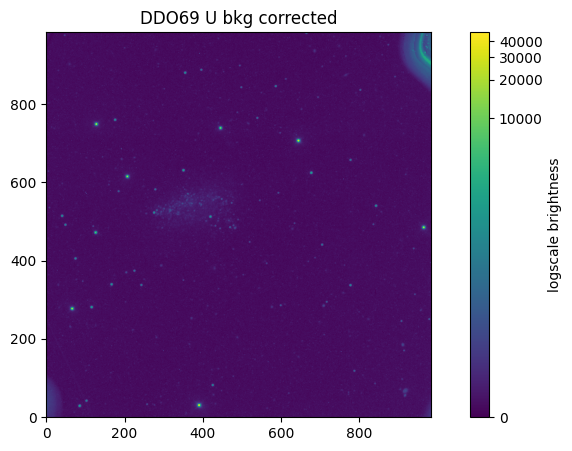

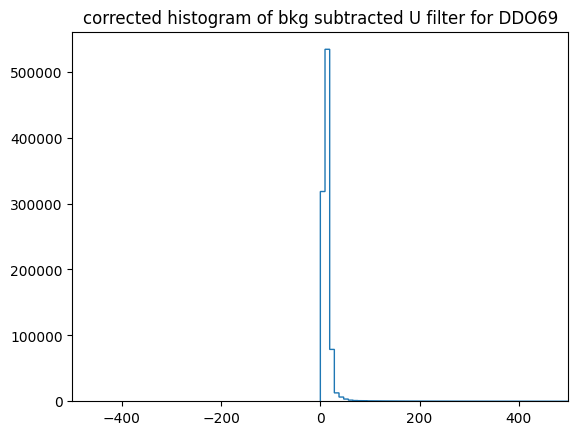

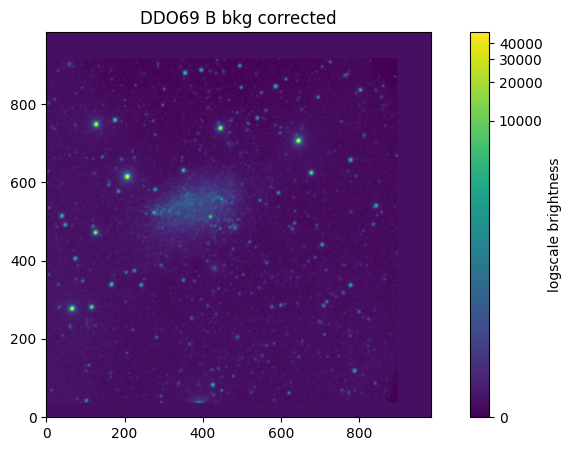

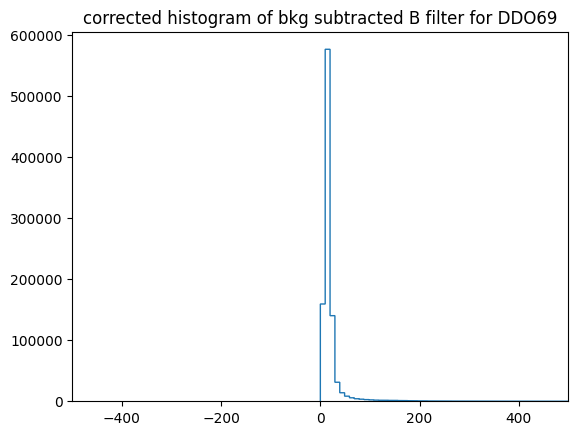

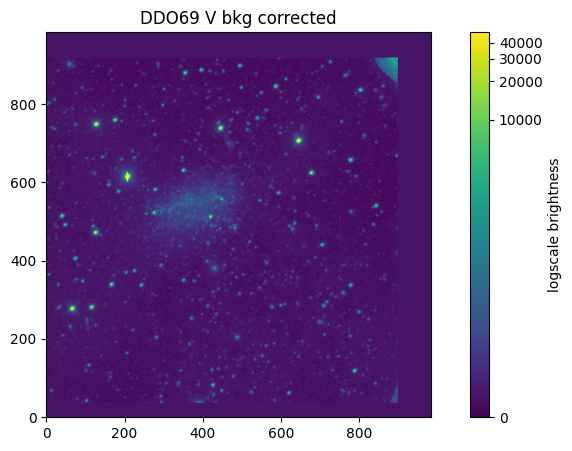

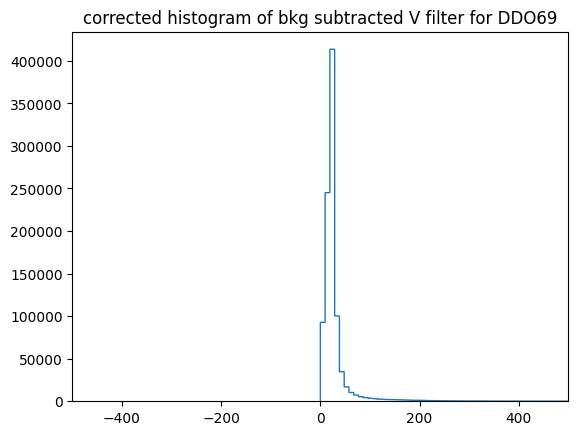

In [10]:
corrected = ltf.background_subtraction(aligned,3,boxes,(3,3))
for i in range(0,3):
    ltf.log_scale_plot(corrected[i],"%s %s bkg corrected"%(galaxy_name,filters[i]),"logscale brightness")
    output_filename = '%s_%s_background_subtracted.fits'%(galaxy_name,filters[i])
    # Create a PrimaryHDU (header/data unit) from your array
    primary_hdu = fits.PrimaryHDU(corrected[i])
    # Create an HDUList and append the PrimaryHDU
    hdul = fits.HDUList([primary_hdu])
    # Write the HDUList to the FITS file
    #hdul.writeto(output_filename, overwrite=True)
    counts, bins = np.histogram(corrected[i], 5000)
    plt.stairs(counts, bins)
    plt.xlim([-500, 500])
    plt.title("corrected histogram of bkg subtracted %s filter for %s" %(filters[i] , galaxy_name))
    plt.show()

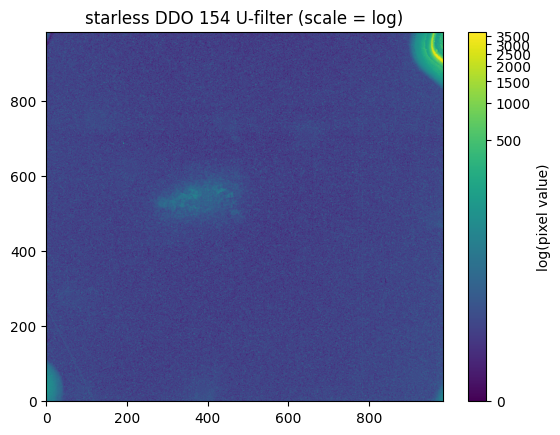

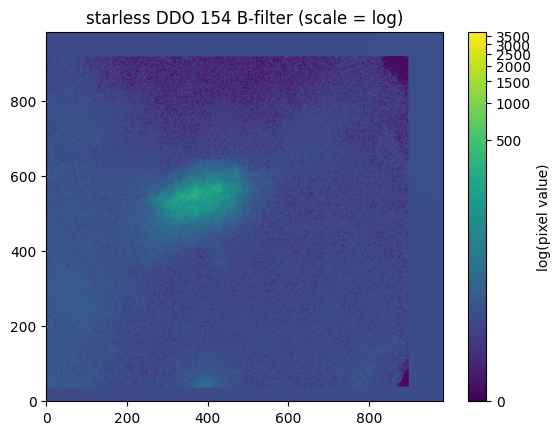

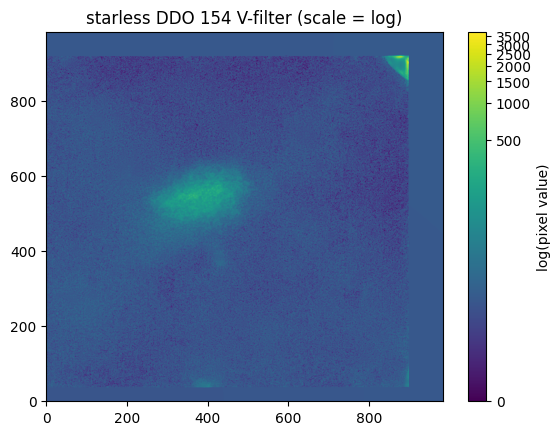

In [11]:
# import starless files----------------------------------------------------------------------------------------------------------------------------------------------------
starless_file_u = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_U_background_subtracted.fit")
starless_u = starless_file_u[0].data
starless_u[starless_u <= 0] = 1
starless_file_b = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_B_background_subtracted.fit")
starless_b = starless_file_b[0].data
starless_b[starless_b <= 0] = 1
starless_file_v = fits.open(r"C:/Users\AYSAN\Desktop/project/Galaxy/Code\d69\starless1\starless_DDO69_V_background_subtracted.fit")
starless_v = starless_file_v[0].data
starless_v[starless_v <= 0] = 1

starless = [starless_u , starless_b , starless_v]

norm = ImageNormalize(vmin=0., stretch=LogStretch())
for i in range(0 , len(starless)):
    
    plt.imshow(starless[i] , origin = "lower" , aspect='auto', norm = norm)
    plt.title('starless DDO 154 %s-filter (scale = log)'%(filters[i]))
    cbar = plt.colorbar()
    cbar.set_label('log(pixel value)')
    plt.show()

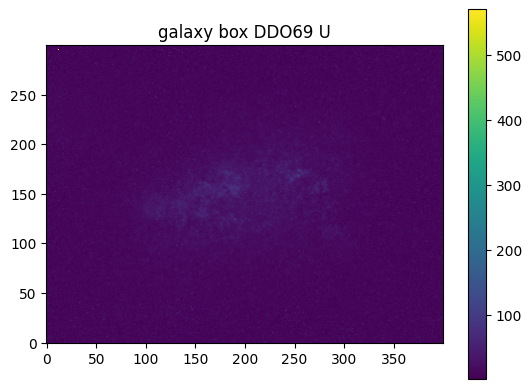

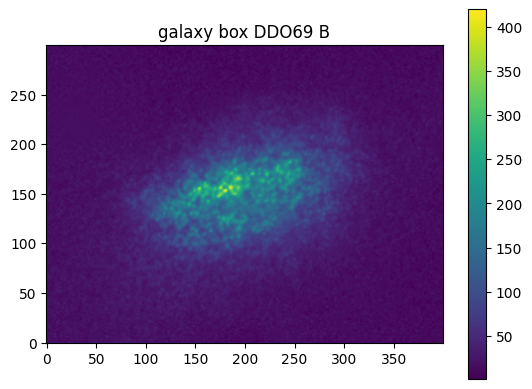

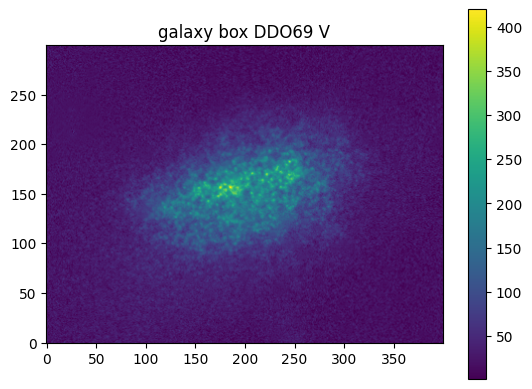

In [96]:
import little_things_functions as ltf
galaxy_boxes = ltf.get_boxes(starless,[380,520],330)
box_size_x = 200
box_size_y = 150
image_boxes = []
for i in range(0 , len(starless)):
        box = starless[i][540 - box_size_y : 540 + box_size_y, 380 - box_size_x : 380 + box_size_x]
        image_boxes.append(box)
for i in range(0,3):
    plt.imshow(image_boxes[i], origin = "lower")
    plt.title("galaxy box %s %s"%(galaxy_name,filters[i]))
    plt.colorbar()
    plt.show()
v_value_box = image_boxes[2]

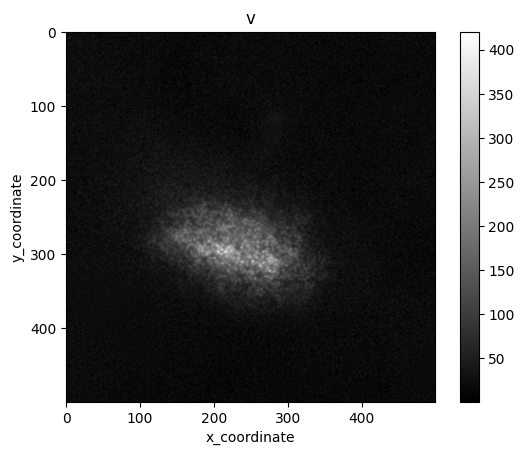

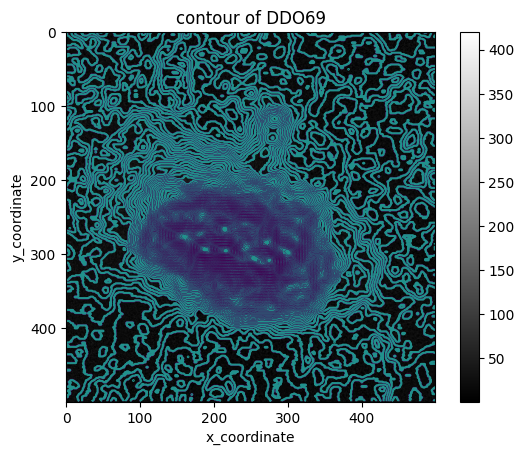

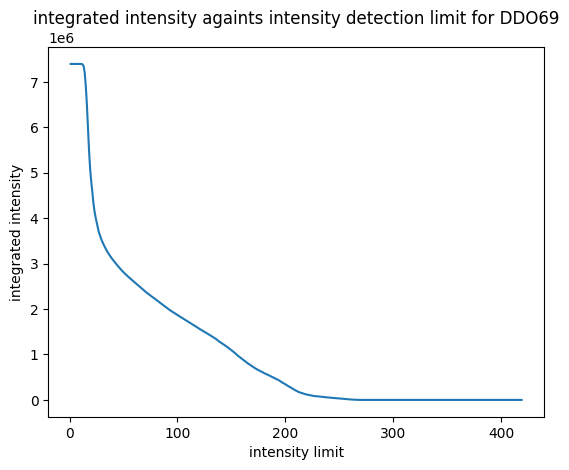

In [13]:
#sina
'''
import Galaxy_Processing as GP
import numpy as np
v_value_box = galaxy_boxes[2]
GP.image_show(v_value_box, "v")
smoothed = gaussian_filter(v_value_box,5)
sth  = GP.half_radius_ellipse(smoothed, v_value_box, np.arange(np.min(v_value_box), np.max(v_value_box)),galaxy_name, [80,150], plot = True, fit = False)
'''

C:\Users\AYSAN\AppData\Local\Temp\ipykernel_21660\1210612200.py:10: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for item in contours.collections:


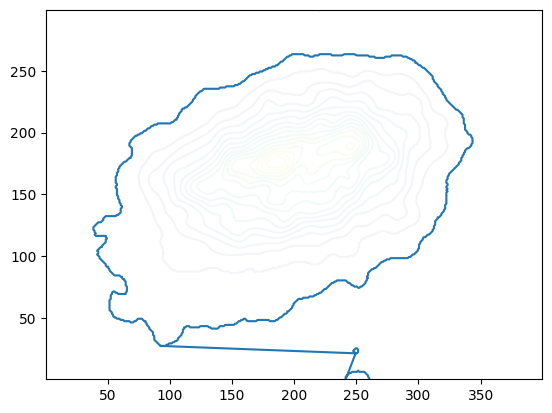

In [93]:
#golta:
v_value_box = image_boxes[2]

smoothed_v_box = gaussian_filter(v_value_box, 5)
contours = plt.contour(smoothed_v_box, origin='lower', alpha=0.05, levels=np.arange(smoothed_v_box.min(), smoothed_v_box.max(), 15))
#contours = plt.contour(data, origin='lower', alpha=0.05)

len_of_ver=[]
path_arr=[]
for item in contours.collections:
    for path in item.get_paths():
        len_of_ver.append(len(path.vertices[:, 0]))
        path_arr.append(path)
    
path_element=np.argmax(len_of_ver)
vertices=path_arr[path_element].vertices
#plt.plot(vertices[:, 0]*pixel_scale, vertices[:, 1]*pixel_scale, color='r', linewidth=1)

x, y = vertices[:, 0], vertices[:, 1]

plt.plot(x,y)


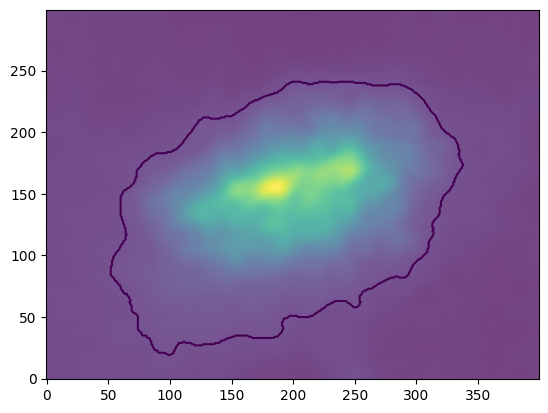

In [103]:
# mine
contour_points = ltf.contour_lines_coordinates(v_value_box, 5, [30])
x_points , y_points = contour_points

(145.4715666711053, 196.24684216223775)
[190.68608923 135.71804232 152.00485425  92.64501766   0.45582041]


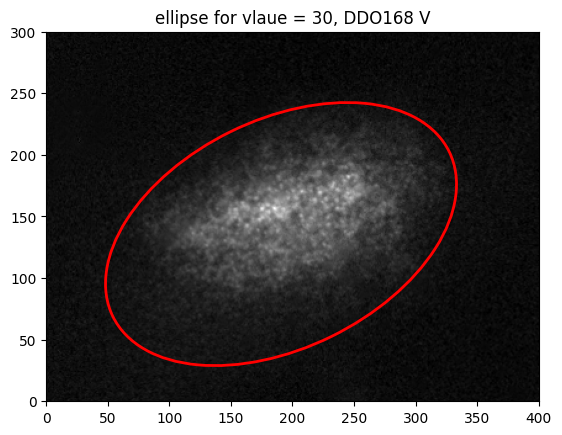

In [104]:

image_center_of_mass = ndimage.center_of_mass(v_value_box)
print(image_center_of_mass)
#coordinates
x, y = image_center_of_mass[1], image_center_of_mass[0]
from scipy.ndimage import gaussian_filter
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse
initial_guess = [x, y, (max(x_points) - min(x_points)) / 2 , (max(y_points) - min(y_points)) / 2 , 0]
popt, pcov = curve_fit(ltf.ellipse, (x_points, y_points), np.zeros_like(x_points), p0=initial_guess)
stdv=np.sqrt(np.diag(pcov))
stdvx=stdv[0]
stdvy=stdv[1]
stdva=stdv[2]
stdvb=stdv[3]
stdvpa=stdv[4]

xc, yc, a, b, theta = popt

curve = ltf.ellipse(x_points,popt[0],popt[1],popt[2],popt[3],popt[4])

xc, yc, a, b, theta = popt
print(popt)
# Create a figure and axis
plt.figure()
ax = plt.gca()

# Display the other image
ax.imshow(v_value_box, cmap='gray' , origin = "lower")

# Create the ellipse
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)

# Add the ellipse to the axis
ax.add_patch(ellipse)

# Set axis limits (adjust as needed)
ax.set_xlim(0,v_value_box.shape[1])
ax.set_ylim(0,v_value_box.shape[0])  # Reverse y-axis for imshow
plt.title("ellipse for vlaue = 30, DDO168 V")
# Show the plot
plt.show()


In [ ]:
'''
ab_ratio = a/b
ba_ratio = b/a
a_list = np.linspace(0, (1.25)*a, 15)
b_list = ba_ratio * a_list
print(a_list)
for i in range(0,len(a_list)):
    plt.figure()
    ax = plt.gca()
    # Display the other image
    ax.imshow(v_value_box, cmap='gray' , origin = "lower")
    ellipse = Ellipse(xy=(xc, yc), width=(2*a_list[i]), height=(2*b_list[i]), angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)
    # Add the ellipse to the axis
    ax.add_patch(ellipse)
    # Set axis limits (adjust as needed)
    ax.set_xlim(0,v_value_box.shape[1])
    ax.set_ylim(0,v_value_box.shape[0])  # Reverse y-axis for imshow
    plt.title("")
    # Show the plot
    plt.show()
'''

In [112]:
from astropy.coordinates import Angle
from photutils.aperture import EllipticalAperture

position_angle = Angle(theta, 'deg') 
ellipse_aper = EllipticalAperture((xc, yc), a, b, theta=position_angle)
aperture_sum = ellipse_aper.do_photometry(v_value_box)['aperture_sum']


TypeError: tuple indices must be integers or slices, not str

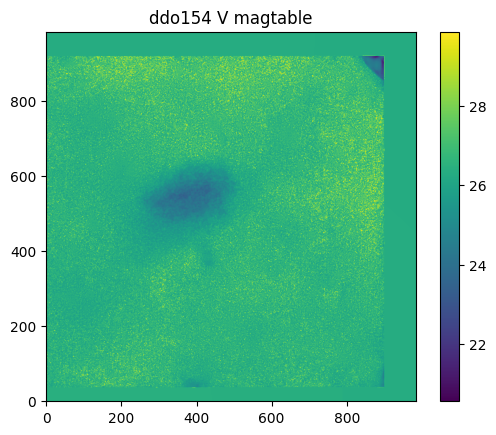

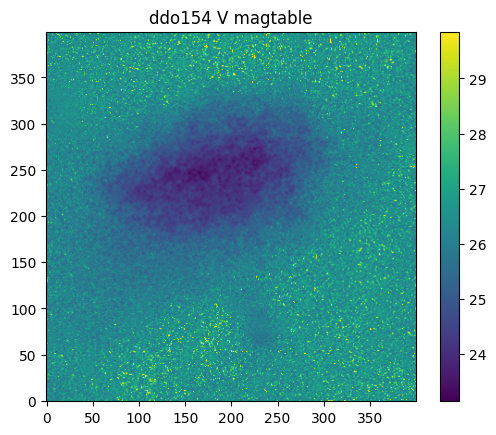

In [ ]:
pixel_scale = 1.134
exposures = [1800, 2400, 1200]
airmass_values=[1.22, 1.04, 1.1]
mU_values = [5.251, 0.459, -0.121, 0]
mV_values = [3.009, 0.2183592, 0.0415, 0.]
mB_values = [3.434, 0.3398903,-0.0157, 0.]
m_values = [mU_values,mB_values,mV_values]
 
plt.imshow(ltf.mag_table_correction(starless,airmass_values,m_values,pixel_scale,exposures)[2] , origin="lower")
plt.title("ddo154 V magtable")
plt.colorbar()
plt.show()

plt.imshow(ltf.mag_table_correction(galaxy_boxes,airmass_values,m_values,pixel_scale,exposures)[2] , origin="lower")
plt.title("ddo154 V magtable")
plt.colorbar()
plt.show()

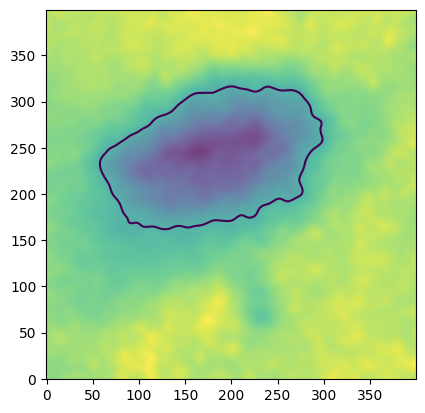

In [ ]:
v_box = ltf.mag_table_correction(galaxy_boxes,airmass_values,m_values,pixel_scale,exposures)[2]
contour_points = ltf.contour_lines_coordinates(v_box, 5, [25])
x_points , y_points = contour_points

In [ ]:
image_center_of_mass = ndimage.center_of_mass(v_box)
print(image_center_of_mass)
#coordinates
x, y = image_center_of_mass[1], image_center_of_mass[0]

(199.07608097977203, 200.10004577496247)


[181.72691099 238.56037294 122.23204205  70.09479526   0.3041347 ]


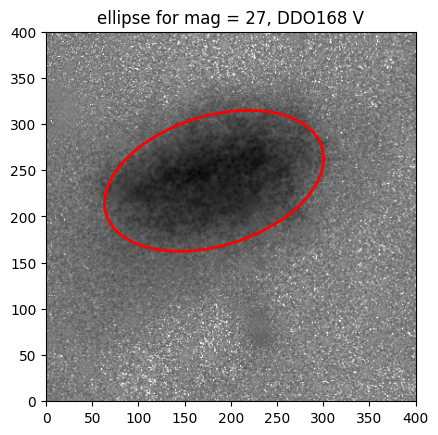

In [ ]:
from scipy.ndimage import gaussian_filter
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse

initial_guess = [x, y, (max(x_points) - min(x_points)) / 2 , (max(y_points) - min(y_points)) / 2 , 0]
popt, pcov = curve_fit(ltf.ellipse, (x_points, y_points), np.zeros_like(x_points), p0=initial_guess)
stdv=np.sqrt(np.diag(pcov))
stdvx=stdv[0]
stdvy=stdv[1]
stdva=stdv[2]
stdvb=stdv[3]
stdvpa=stdv[4]

xc, yc, a, b, theta = popt

curve = ltf.ellipse(x_points,popt[0],popt[1],popt[2],popt[3],popt[4])

xc, yc, a, b, theta = popt
print(popt)
# Create a figure and axis
plt.figure()
ax = plt.gca()

# Display the other image
ax.imshow(v_box, cmap='gray' , origin = "lower")

# Create the ellipse
ellipse = Ellipse(xy=(xc, yc), width=2*a, height=2*b, angle=np.degrees(theta), edgecolor='r', facecolor='none', linewidth=2)

# Add the ellipse to the axis
ax.add_patch(ellipse)

# Set axis limits (adjust as needed)
ax.set_xlim(0,v_box.shape[1])
ax.set_ylim(0,v_box.shape[0])  # Reverse y-axis for imshow
plt.title("ellipse for mag = 27, DDO168 V")
# Show the plot
plt.show()